### Импорт и загрузка данных

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf
from scipy.fftpack import fft
from sklearn.decomposition import PCA

import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

# Загрузка данных
df = pd.read_csv('data/datatraining.txt', parse_dates=['date'])
df.set_index('date', inplace=True)

### 1. Базовая описательная статистика
* минимум
* максимум
* среднее
* мода
* медианна
* гистограмма
* распределение
* средне-квадратическое отклонение
* диаграмма размаха
* визуализация

In [2]:
df.head(5)

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


**Date:**
Дата и время.

**Temperature:**
Значение температуры (в градусах Цельсия).

**Humidity:**
Процентное значение влажности воздуха в помещении.

**Light:**
Уровень освещенности.

**CO2:**
Концентрация углекислого газа (CO₂) в помещении, измеренная в ppm (частицах на миллион).

**HumidityRatio:**
Отношение водяного пара в воздухе к сухому воздуху.

**Occupancy:**
Категориальная переменная, которая показывает, занято ли помещение или нет (1 — занято, 0 — пустое).

In [3]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8143 entries, 2015-02-04 17:51:00 to 2015-02-10 09:33:00
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    8143 non-null   float64
 1   Humidity       8143 non-null   float64
 2   Light          8143 non-null   float64
 3   CO2            8143 non-null   float64
 4   HumidityRatio  8143 non-null   float64
 5   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 445.3 KB
None


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


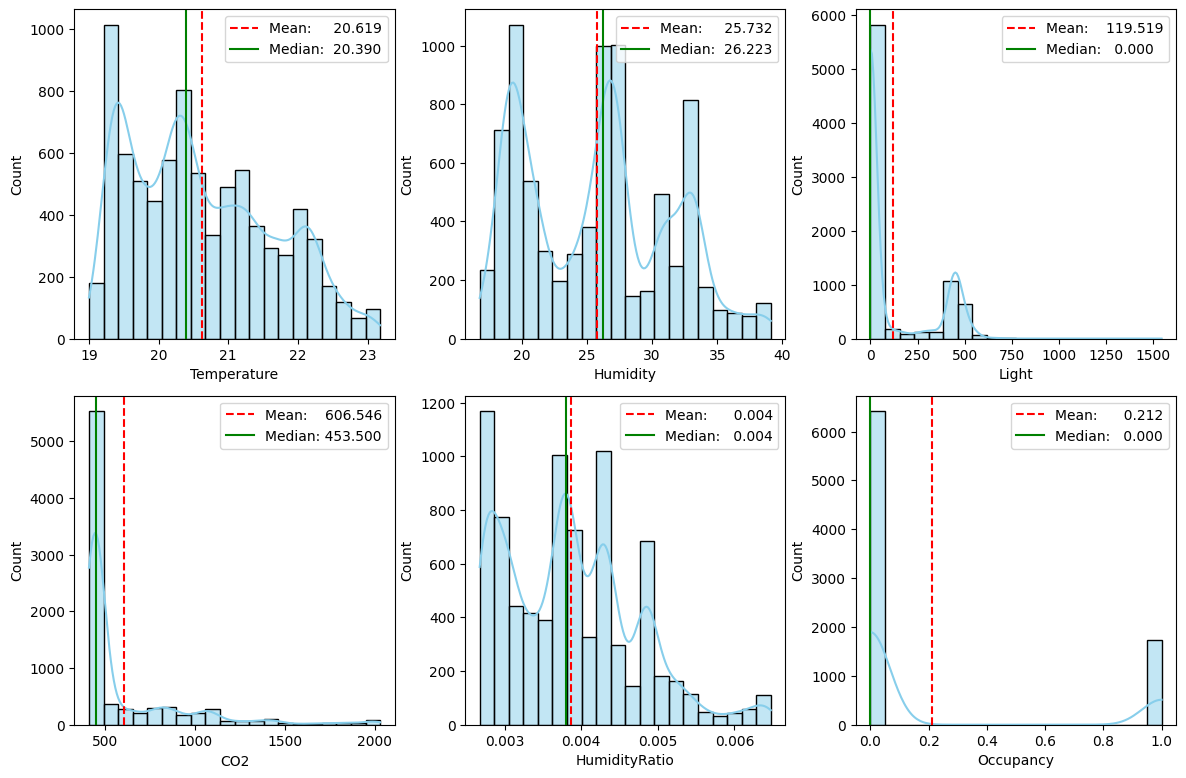

In [4]:
# Базовая описательная статистика
def descriptive_stats(df):
    # Определение количества столбцов и строк для подграфиков
    num_columns = len(df.select_dtypes(include=[float, int]).columns)
    nrows = 2
    ncols = (num_columns + 1) // 2  # чтобы учесть нечетное количество графиков
    
    # Создаем холст с подграфиками
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 4 * nrows))
    fig.tight_layout(pad=2.0)
    
    # Преобразуем массив осей для удобного перебора
    axes = axes.flatten()
    
    for i, column in enumerate(df.select_dtypes(include=[float, int]).columns):
        # Среднее и медиана
        mean_val = df[column].mean()
        median_val = df[column].median()

        # Построение гистограммы с KDE
        sns.histplot(df[column], kde=True, ax=axes[i], color="skyblue", edgecolor="black", bins=20)
        
        # Добавляем линии для среднего и медианы
        axes[i].axvline(mean_val, color='red', linestyle='--', label=f'{"Mean:":<7}{mean_val:>9.3f}')
        axes[i].axvline(median_val, color='green', linestyle='-', label=f'{"Median:":<7}{median_val:>8.3f}')
        
        # Настройка заголовка и легенды
        # axes[i].set_title(f'{column}', fontsize=10)
        axes[i].legend(loc='upper right')
    
    # Удаляем пустые подграфики, если признаков нечетное количество
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.show()

descriptive_stats(df)

Note: так как значения имеют довольно большой разброс в значениях, то их стоит нормализовать, чтобы хорошо отобразить boxplot.

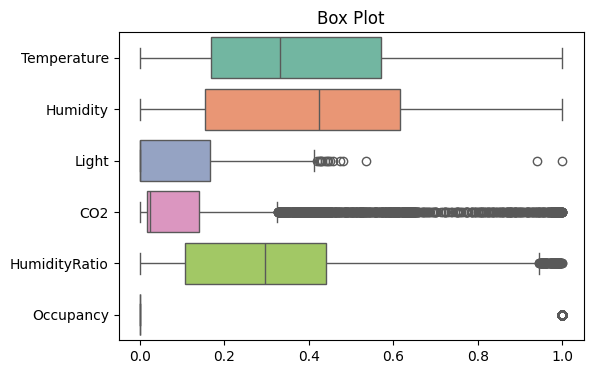

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,0.387341,0.401676,0.077292,0.119942,0.312576,0.212330,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,0.243281,0.247233,0.125947,0.194536,0.224186,0.408982,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,0.167464,0.154431,0.000000,0.016246,0.106304,0.000000,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,0.332536,0.423623,0.000000,0.025220,0.296338,0.000000,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,0.571770,0.616307,0.165795,0.139925,0.441308,0.000000,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


In [87]:
min_max_scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[df.select_dtypes(include=[float, int]).columns] = min_max_scaler.fit_transform(df.select_dtypes(include=[float, int]))

# Диаграмма размаха (box plot)
plt.figure(figsize=(6, 4))
plt.title('Box Plot for Features')
sns.boxplot(df_normalized, orient="h", palette="Set2")
plt.title(f'Box Plot')
plt.show()

pd.concat([df_normalized.describe(), df.describe()], axis=1)

Интереса ради: видно, что $CO_2$ имеет много выбросов. Попробуем оценить, в какой момент это происходит.
Так как я не разбираюсь в значениях $CO_2$, то уточнил у GPT:

Концентрация углекислого газа (CO₂) в помещении варьируется в зависимости от вентиляции и количества людей. Общепринятые нормы и рекомендации:

    400–500 ppm: Это обычный уровень CO₂ на открытом воздухе.
    600–1000 ppm: Комфортный и безопасный уровень для большинства внутренних помещений с хорошей вентиляцией.
    1000–1500 ppm: Начинается ощущение "затхлости", возможен легкий дискомфорт. Этот уровень допустим, но уже сигнализирует о необходимости улучшения вентиляции.
    1500–2000 ppm: Может вызвать ощущение усталости, снижение концентрации и легкий дискомфорт. Желательно избегать таких значений в жилых или рабочих зонах.
    Выше 2000 ppm: Высокий уровень CO₂, который может вызвать головную боль, сонливость и ухудшение концентрации. Это значение указывает на необходимость срочного улучшения вентиляции.


In [147]:
# Пороговые значения для определения выбросов
Q1 = df_normalized["CO2"].quantile(0.25)
Q3 = df_normalized["CO2"].quantile(0.75)
IQR = Q3 - Q1

# Границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтрация строк с выбросами по CO2
outliers_df = df_normalized[(df_normalized["CO2"] < lower_bound) | (df_normalized["CO2"] > upper_bound)]
outliers_df.resample('d').count()


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-05,412,412,412,412,412,412
2015-02-06,16,16,16,16,16,16
2015-02-07,0,0,0,0,0,0
2015-02-08,0,0,0,0,0,0
2015-02-09,635,635,635,635,635,635


Видно, что есть 2 дня с выбросами. Можно сделать срез по ним и посмотреть другие данные. Может, они тоже завышены.

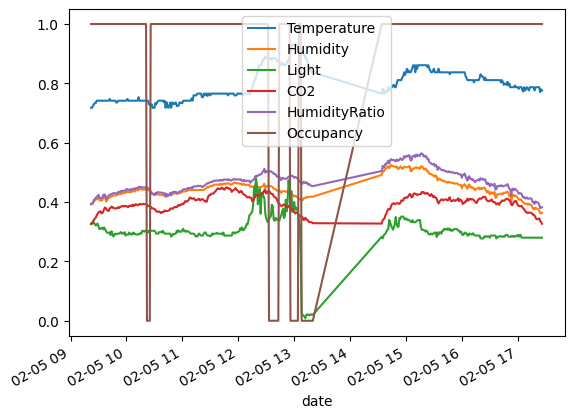

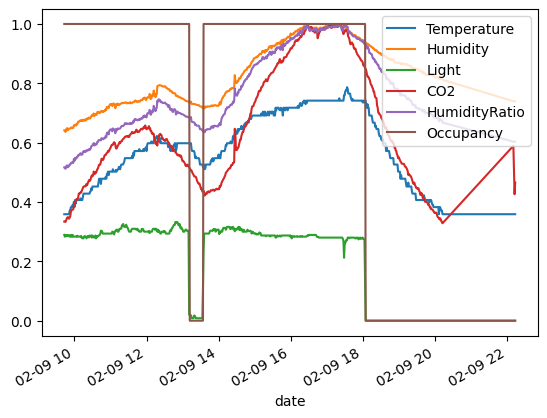

In [153]:
for i, group in outliers_df.resample('d'):
    if i in [pd.Timestamp('2015-02-05'), pd.Timestamp('2015-02-09')]:
        group.plot()

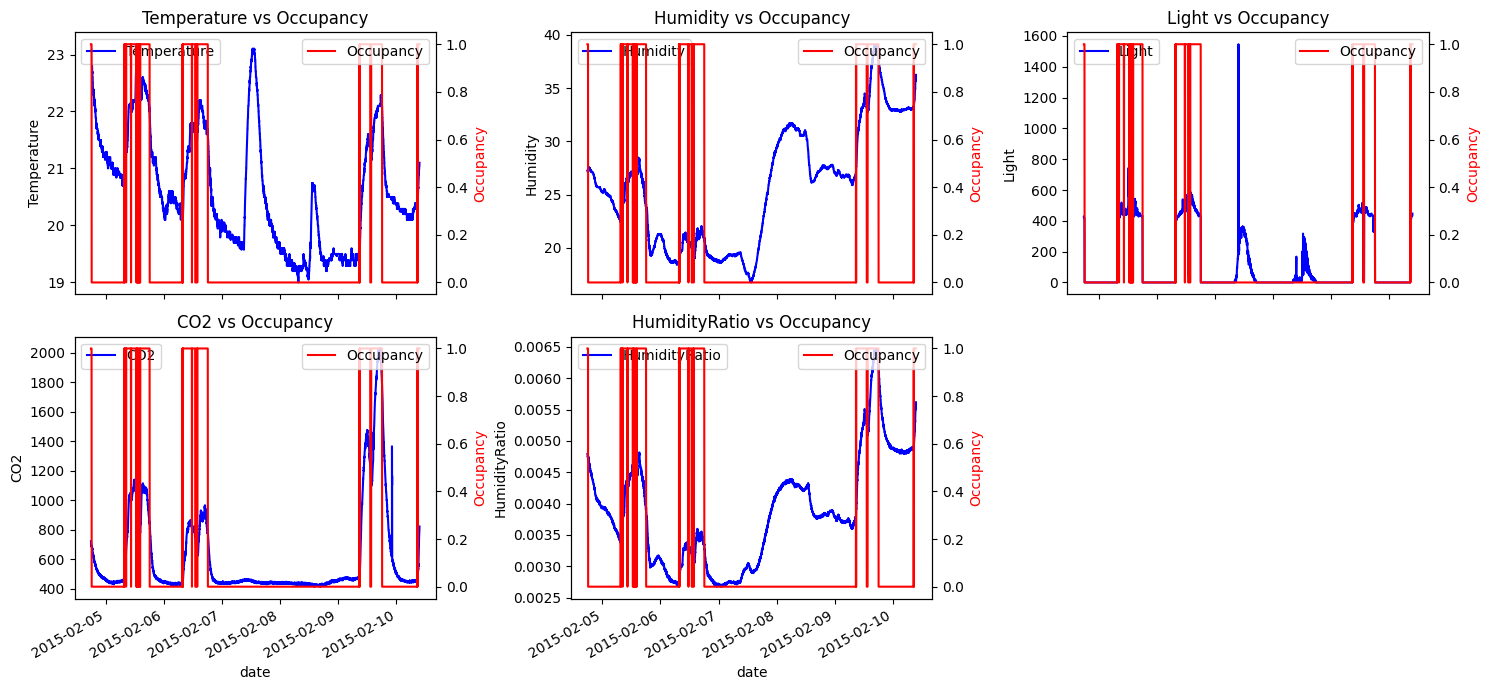

In [154]:
num_columns = len(df.columns[:-1])
ncols = 3
nrows = (num_columns + ncols - 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 7), sharex=True)
axes = axes.flatten()

for i, column in enumerate(df.columns[:-1]):
    ax = axes[i]
    df[column].plot(ax=ax, color='blue', label=column)
    ax.set_title(f'{column} vs Occupancy')
    ax.set_ylabel(column)
    
    ax_occ = ax.twinx()
    df['Occupancy'].plot(ax=ax_occ, color='red', label='Occupancy')
    ax_occ.set_ylabel('Occupancy', color='red')
    
    ax.legend(loc='upper left')
    ax_occ.legend(loc='upper right')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


На данном графике изображены данные относительно наличия людей в помещении в течение двух дней.

Легко заметить:
1. Рабочий день с 09:00 до 18:00
2. Любой параметр становится больше как раз с начала рабочего дня

In [17]:
data = df.copy()
data.Occupancy = data.Occupancy.astype(str)
fig = px.scatter_3d(data, x='Temperature', y='Humidity', z='CO2', size='Light', color='Occupancy', color_discrete_map={'1':'red', '0':'blue'})
fig.update_layout(scene_zaxis_type="log", title={'text': "Features and Occupancy",
                                                'y':0.9,
                                                'x':0.5,
                                                'xanchor': 'center',
                                                'yanchor': 'top'})
iplot(fig)

### 2. Работа с пропусками

In [18]:
# Работа с пропусками
print("\nMissing values before handling:")
print(df.isna().sum())
df.fillna(df.median(), inplace=True)  # Заполнение медианными значениями
print("\nMissing values after handling:")
print(df.isna().sum())


Missing values before handling:
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

Missing values after handling:
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64


### 3. Работа с дублирующими данными

In [27]:
# Работа с дублирующими данными
duplicates = df.reset_index().duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
# df.drop_duplicates(inplace=True)


Number of duplicate rows: 0


### 4. работа с выбросами

In [ ]:
# Работа с выбросами (Используем IQR для выявления выбросов)
def remove_outliers(df):
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        mask = (df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))
        df_not_outliers = df[mask]
    return df_not_outliers

df_not_outliers = remove_outliers(df)


### 5. проведение статистических тестов, построение коррелограммы и иные исследования на временные лаги

In [ ]:
# Статистические тесты и корреляция
print("\nCorrelation matrix:")
plt.figure(figsize=(10, 8))
sns.heatmap(df_not_outliers.corr(), annot=True, cmap='coolwarm')
plt.show()

# Анализ временных лагов
plt.figure(figsize=(10, 5))
plot_acf(df_not_outliers['Temperature'].dropna(), lags=50)
plt.title('ACF for Temperature')
plt.show()

### 6. спектральный анализ (выявление колебаний и их частот)

In [ ]:
# Спектральный анализ (например, для температуры)
def spectral_analysis(series):
    series = series.dropna()
    freq_spectrum = np.abs(fft(series))
    plt.figure(figsize=(10, 5))
    plt.plot(freq_spectrum[:len(freq_spectrum) // 2])
    plt.title("Spectral Analysis")
    plt.xlabel("Frequency")
    plt.ylabel("Amplitude")
    plt.show()

spectral_analysis(df['Temperature'])

### 7. работа с категориальными данными

In [ ]:
# Работа с категориальными данными
df = pd.get_dummies(df, columns=['Occupancy'], drop_first=True)

# Анализ зависимостей между признаками
sns.pairplot(df)
plt.show()

### 8. Анализ зависимостей между признаками
* визуализация (биплоты, скрипичные диаграммы и т.д.)
* матрица корреляций

In [ ]:
# Скрипичные диаграммы для распределения данных по переменным
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 5))
    sns.violinplot(x='Occupancy_1', y=column, data=df)
    plt.title(f'Violin Plot for {column}')
    plt.show()

### 9. Стандартизация (вокруг нуля; стремление к N(0,1)), нормализация

In [15]:
# Стандартизация и нормализация
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[df.select_dtypes(include=[np.number]).columns] = scaler.fit_transform(df.select_dtypes(include=[np.number]))

min_max_scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[df.select_dtypes(include=[np.number]).columns] = min_max_scaler.fit_transform(df.select_dtypes(include=[np.number]))

print("\nData after standardization and normalization:")
print(df_scaled.head())
print(df_normalized.head())


Data after standardization and normalization:
                  date  Temperature  Humidity     Light       CO2  \
17 2015-02-04 18:07:00     3.018524  0.412770 -0.322338  2.932095   
18 2015-02-04 18:08:00     2.957016  0.430373 -0.322338  2.980055   
19 2015-02-04 18:08:59     2.957016  0.449931 -0.322338  2.980055   
20 2015-02-04 18:10:00     2.895509  0.449931 -0.322338  3.034865   
21 2015-02-04 18:10:59     2.895509  0.449931 -0.322338  3.041716   

    HumidityRatio  
17       1.489990  
18       1.489810  
19       1.514634  
20       1.492021  
21       1.492021  
                  date  Temperature  Humidity  Light       CO2  HumidityRatio
17 2015-02-04 18:07:00     0.975610  0.575874    0.0  0.517823       0.809643
18 2015-02-04 18:08:00     0.962195  0.580832    0.0  0.524566       0.809593
19 2015-02-04 18:08:59     0.962195  0.586340    0.0  0.524566       0.816475
20 2015-02-04 18:10:00     0.948780  0.586340    0.0  0.532274       0.810206
21 2015-02-04 18:10:59     0